<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [317]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact
plt.style.use('fivethirtyeight')

%matplotlib inline


file_nested_list = pd.read_csv('/Users/ka1/Documents/generalassembly/datascience-918/unit-2_project/unit-2_project/data/chipotle.tsv', sep='\t')

file_nested_list.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [7]:
# chipotle_header = file_nested_list[0]
# chipotle_data = file_nested_list[1:]
# print(chipotle_header)
# print('')
# #print(chipotle_data)

file_nested_list.columns


Index([u'order_id', u'quantity', u'item_name', u'choice_description',
       u'item_price'],
      dtype='object')

In [8]:
file_nested_list.values

array([[1, 1, 'Chips and Fresh Tomato Salsa', nan, '$2.39 '],
       [1, 1, 'Izze', '[Clementine]', '$3.39 '],
       [1, 1, 'Nantucket Nectar', '[Apple]', '$3.39 '],
       ..., 
       [1834, 1, 'Chicken Salad Bowl',
        '[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]',
        '$11.25 '],
       [1834, 1, 'Chicken Salad Bowl',
        '[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]', '$8.75 '],
       [1834, 1, 'Chicken Salad Bowl',
        '[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]',
        '$8.75 ']], dtype=object)

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [15]:
# last_order_id = 0
# new_order_id = 0
# order_sum = 0
# order_cost = 0.0

# for order_id in chipotle_data:
#     new_order_id = order_id[0]
#     item_price_str = order_id[4]
#     item_price_float = float(item_price_str[1:])
#     order_cost = order_cost + item_price_float
#     if new_order_id != last_order_id:
#         order_sum = order_sum + 1
#     last_order_id = new_order_id

# ave_order_cost = order_cost / order_sum
# print(order_sum)
# #print(last_order_id)
# print(order_cost)    

# print('The average cost per order is ${0:.2f}.'.format(ave_order_cost))

#file_nested_list['item_price']
print(file_nested_list.describe())
file_nested_list.describe(include='all')

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


In [13]:
! pwd

/Users/ka1/Documents/generalassembly/datascience-918/unit-2_project/unit-2_project


In [22]:
file_nested_list['item_price'] = file_nested_list['item_price'].map(lambda x: x.lstrip('$'))

In [26]:
file_nested_list['item_price'] = file_nested_list['item_price'].astype(float)
file_nested_list.describe(include='all')


,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622.000000
unique,NaN,NaN,50,1043,NaN
top,NaN,NaN,Chicken Bowl,[Diet Coke],NaN
freq,NaN,NaN,726,134,NaN
mean,927.254868,1.075725,NaN,NaN,7.464336
std,528.890796,0.410186,NaN,NaN,4.245557
min,1.000000,1.000000,NaN,NaN,1.090000
25%,477.250000,1.000000,NaN,NaN,3.390000
50%,926.000000,1.000000,NaN,NaN,8.750000
75%,1393.000000,1.000000,NaN,NaN,9.250000


In [32]:
order_cost_sum = file_nested_list['item_price'].sum()
order_cost_sum

34500.16000000046

In [30]:
number_of_orders = file_nested_list['order_id'].max()
number_of_orders

1834

In [33]:
ave_order_cost = order_cost_sum / number_of_orders
print(number_of_orders)
print(order_cost)    

print('The average cost per order is ${0:.2f}.'.format(ave_order_cost))


1834
34500.16
The average cost per order is $18.81.


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [61]:
unq_sodas = file_nested_list.loc[(file_nested_list['item_name'] == 'Canned Soda') | (file_nested_list['item_name'] == 'Canned Soft Drink')]

type(unq_sodas)

unq_sodas['choice_description'].unique()

array(['[Sprite]', '[Dr. Pepper]', '[Mountain Dew]', '[Diet Dr. Pepper]',
       '[Coca Cola]', '[Diet Coke]', '[Coke]', '[Lemonade]', '[Nestea]'], dtype=object)

In [69]:
unique_sodas = (file_nested_list
                .loc[(file_nested_list['item_name'] == 'Canned Soda') | (file_nested_list['item_name'] == 'Canned Soft Drink')]
                .choice_description
                .unique())

print(unique_sodas)

['[Sprite]' '[Dr. Pepper]' '[Mountain Dew]' '[Diet Dr. Pepper]'
 '[Coca Cola]' '[Diet Coke]' '[Coke]' '[Lemonade]' '[Nestea]']


In [57]:
unique_sodas = unq_sodas.choice_description.unique()
print(unique_sodas)

['[Sprite]' '[Dr. Pepper]' '[Mountain Dew]' '[Diet Dr. Pepper]'
 '[Coca Cola]' '[Diet Coke]' '[Coke]' '[Lemonade]' '[Nestea]']


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [120]:
number_of_commas = (fnl[fnl['item_name']
                        .str
                        .contains("Burrito")]
                    .choice_description
                    .str
                    .count(',')                    
                    .sum())

print(number_of_commas)

5151


In [122]:
number_of_Burritos = (fnl[fnl['item_name']
                          .str
                          .contains("Burrito")]
                      .item_name
                      .str
                      .count('Burrito')
                      .sum())

print(number_of_Burritos)

type(number_of_Burritos)

1172


long

In [123]:
# We know by looking at the data that there is one more topping than commas in the row
# Therefore, adding the total number of rows with the word 'Burrito' to the total number of commas will result
# in the total number of toppings.

total_number_of_toppings = number_of_commas + number_of_Burritos * 1.0

print(total_number_of_toppings)

6323.0


In [124]:
average_number_of_toppings = total_number_of_toppings / number_of_Burritos

print(average_number_of_toppings)

5.39505119454


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [144]:
fnl.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


In [157]:
from collections import defaultdict

chips_orders = (fnl[fnl['item_name']
                          .str
                          .contains("Chips")])

#print(chips_orders.head())

b ={}
d = defaultdict(int)

for k in chips_orders['item_name']:
                      d[k] += 1

# d.items()

for u in d:
    b[u] = d[u]

b

# Original example found for defaultdict(int)
# >>> s = 'mississippi'
# >>> d = defaultdict(int)
# >>> for k in s:
# ...     d[k] += 1
# ...
# >>> d.items()
# [('i', 4), ('p', 2), ('s', 4), ('m', 1)]


{'Chips': 211,
 'Chips and Fresh Tomato Salsa': 110,
 'Chips and Guacamole': 479,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 22,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 43,
 'Chips and Tomatillo Red Chili Salsa': 48,
 'Chips and Tomatillo-Green Chili Salsa': 31,
 'Chips and Tomatillo-Red Chili Salsa': 20,
 'Side of Chips': 101}

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


In [ ]:
# What is the distribution of proteins?


In [167]:
h ={}
j = defaultdict(int)

for k in fnl['item_name']:
                      j[k] += 1

# d.items()

for u in j:
    h[u] = j[u]

h

{'6 Pack Soft Drink': 54,
 'Barbacoa Bowl': 66,
 'Barbacoa Burrito': 91,
 'Barbacoa Crispy Tacos': 11,
 'Barbacoa Salad Bowl': 10,
 'Barbacoa Soft Tacos': 25,
 'Bottled Water': 162,
 'Bowl': 2,
 'Burrito': 6,
 'Canned Soda': 104,
 'Canned Soft Drink': 301,
 'Carnitas Bowl': 68,
 'Carnitas Burrito': 59,
 'Carnitas Crispy Tacos': 7,
 'Carnitas Salad': 1,
 'Carnitas Salad Bowl': 6,
 'Carnitas Soft Tacos': 40,
 'Chicken Bowl': 726,
 'Chicken Burrito': 553,
 'Chicken Crispy Tacos': 47,
 'Chicken Salad': 9,
 'Chicken Salad Bowl': 110,
 'Chicken Soft Tacos': 115,
 'Chips': 211,
 'Chips and Fresh Tomato Salsa': 110,
 'Chips and Guacamole': 479,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 22,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 43,
 'Chips and Tomatillo Red Chili Salsa': 48,
 'Chips and Tomatillo-Green Chili Salsa': 31,
 'Chips and Tomatillo-Red Chili Salsa': 20,
 'Crispy Tacos': 2,
 'Izze': 20,
 'Nantucket Nec

In [162]:
prots = ['Barbacoa', 'Carnitas', 'Chicken', 'Steak', 'Veggie']

In [339]:
order_prot_dict = {}

for prot in prots:
    order_prot_dict[prot] = int((fnl[fnl['item_name']
                          .str
                          .contains(prot)]
                        .item_name
                        .str
                        .count(prot)
                        .sum()))

print(order_prot_dict)

order_prot_list = order_prot_dict.items()

print(order_prot_list)

{'Steak': 702, 'Chicken': 1560, 'Carnitas': 181, 'Veggie': 212, 'Barbacoa': 203}
[('Steak', 702), ('Chicken', 1560), ('Carnitas', 181), ('Veggie', 212), ('Barbacoa', 203)]


In [358]:
df27 = pd.DataFrame(order_prot_dict, index = [0])
df27
df37 = pd.Series(order_prot_dict)
df37

Barbacoa    203 
Carnitas    181 
Chicken     1560
Steak       702 
Veggie      212 
dtype: int64

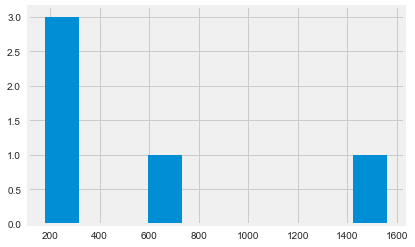

In [360]:
df37.hist();

In [228]:
df = pd.DataFrame(order_prot_list, columns=['Protein', 'Qty'])

In [276]:
print(order_prot_list)

[('Steak', 702), ('Chicken', 1560), ('Carnitas', 181), ('Veggie', 212), ('Barbacoa', 203)]


In [287]:
df

,Protein,Qty
0,Steak,702
1,Chicken,1560
2,Carnitas,181
3,Veggie,212
4,Barbacoa,203


In [336]:
df.set_index('Protein')
df
#  df.describe()
# df.index()
# df.columns()

,Protein,Qty
0,Steak,702
1,Chicken,1560
2,Carnitas,181
3,Veggie,212
4,Barbacoa,203


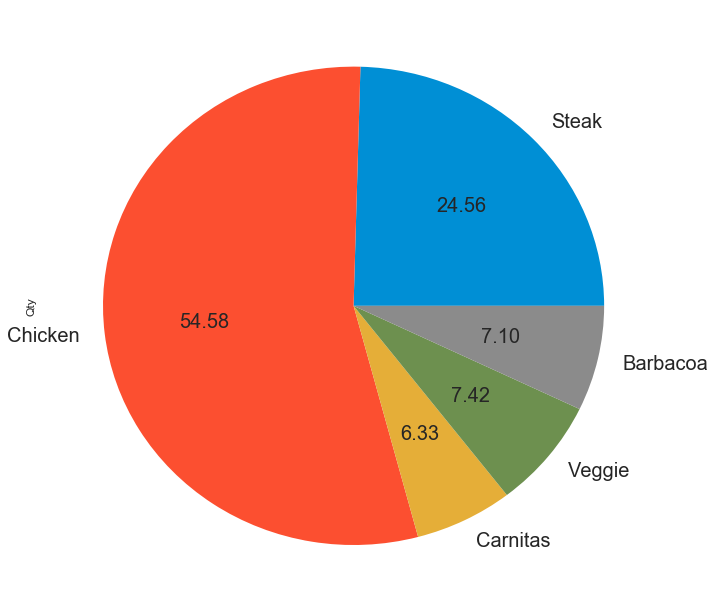

In [320]:
df2 = df.set_index(['Protein'])
df2.plot.pie(y='Qty',figsize=(10, 11),autopct='%.2f', fontsize=20, legend=None);

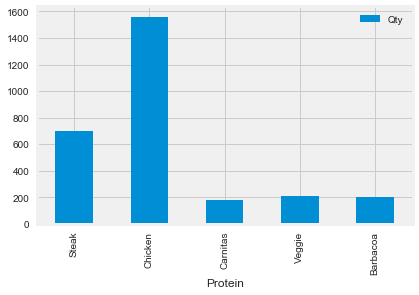

In [322]:
df.plot.bar(x='Protein');